# Разбиение выборки

Какие бывают выборки:

        Обучающая — подмножество данных, на котором мы обучаем модель.
        Валидационная — подмножество данных, на котором мы валидируем модель, то есть проверяем промежуточные результаты. Выборка нужна для проверки модели.
        Тестовая — подмножество данных, на котором мы тестируем модель после проверки всевозможных гипотез.


Как разбить выборку

    сomplete CV — полный скользящий контроль

В данном случае оценка строится по всем возможным разбиениям. Важно упомянуть этот метод, однако стоит понимать, что даже при малых размерах длины обучающей выборки число выборки очень большое, и это затрудняет практическое применение данного метода. Полный скользящий контроль используют в теоретических исследованиях или в тех случаях (довольно редких), когда удается вывести вычислительную формулу, позволяющую реализовать вычисления.

К примеру, для метода k ближайших соседней такая формула известна, об этом можно почитать тут. Но все же этот метод разбиения используется на практике крайне редко.

    hold-out — отложенная выборка

Разбиваем выборку на обучающую, валидационную и, по желанию, на тестовую выборки. Обычно в соотношении 60/40 или 70/30, вместе с тестовой — 60/20/20 или 70/15/15.

Данный метод чаще всего применяется в случае больших датасетов в силу того, что требует значительно меньше вычислительных мощностей, чем другие методы.

Однако важно помнить, что оценка в этом методе сильно зависит от разбиения. Это плохо, так как оценка должна в первую очередь характеризовать сам алгоритм обучения, а не способ разбиения.

    k-fold — cross-validation, перекрёстная валидация
        Разбиваем выборку на k частей.
        Повторяем k раз: обучаем на k-1 частях, валидируем на оставшейся части.
        На каждой итерации валидируем на части данных, на которой ещё не валидировали.
        Усредняем значения метрики.
    Позволяет сделать оценку качества более робастной — устойчивой к помехам.

Чаще всего k имеет значение 10 (или 5 в случае маленьких выборок).

    t×k-fold кросс-валидация

Процедура выполняется t раз. Обучающая выборка случайным образом разбивается на k непересекающихся, одинаковых по объему частей. Производится k итераций. На каждой итерации происходит k-fold-разбиение.

По сути, такой тип валидации — это k-fold валидация, которая повторяется t раз. Такой способ контроля обладает всеми преимуществами k-fold-валидации, но при этом добавляется возможность увеличивать число разбиений.

    leave-one-out — отложенный пример

Предельный случай k-fold, при котором k равняется размеру всей выборки:

    Выбираем пример для валидации, обучаем на всех остальных.
    Выбираем пример для валидации, который ещё не видели, возвращаемся в пункт 1.

Частный случай leave-P-out, при котором нужно перебрать все способы выбора P-элементов из выборки.  Большим недостатком данного метода является то, что он очень ресурсозатратен. Однако нельзя утверждать, что он вообще не используется. В некоторых методах обучения вычисление LOO получается заметно ускорить, и его использование становится возможным.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

In [3]:
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)  #реализация разбиения
kf.get_n_splits(X) #возвращает количество разбиений
kf.split(X) #возвращает индексы для разбиения

<generator object _BaseKFold.split at 0x000001878BF3FF68>

Посмотрим на работу hold-out — отложенной выборки на примере датасета с ирисами. Целевая переменная — класс цветка. Загрузим данные с помощью библиотеки Pandas:

In [4]:
import pandas as pd

iris_data = pd.read_csv('iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

У нас есть четыре признака, относящиеся к размерам цветка, и классы. На первом этапе мы разобьём выборку на две части: тренировочную и валидационную, а позже рассмотрим, как добавить тестовую. Воспользуемся методом train_test_split() из библиотеки sklearn:

In [5]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


Теперь визуализируем наше разбиение с помощью специального метода:

In [6]:
import matplotlib.pyplot as plt

def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

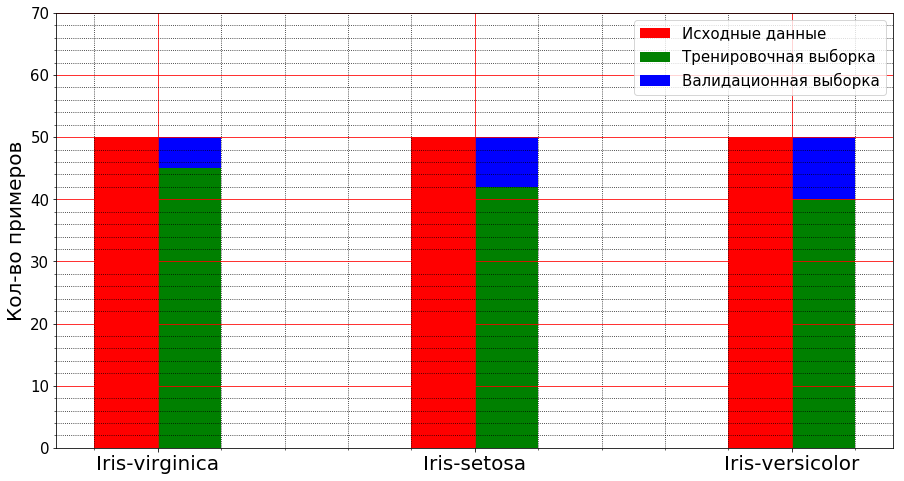

In [7]:
visualize_train_valid_counts(iris_data, train, valid)

У нас три класса цветков, в каждом из которых получилось разное количество примеров с выборками, в третьем примере значительно больше примеров на валидационной выборке. Получилось неравномерное распределение классов после разбиения, так как мы не учли доли классов.

Проблема решается с помощью stratified разбиения или стратифицированного разбиения. В библиотеке sklearn есть нужный нам класс StratifiedShuffleSplit:

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

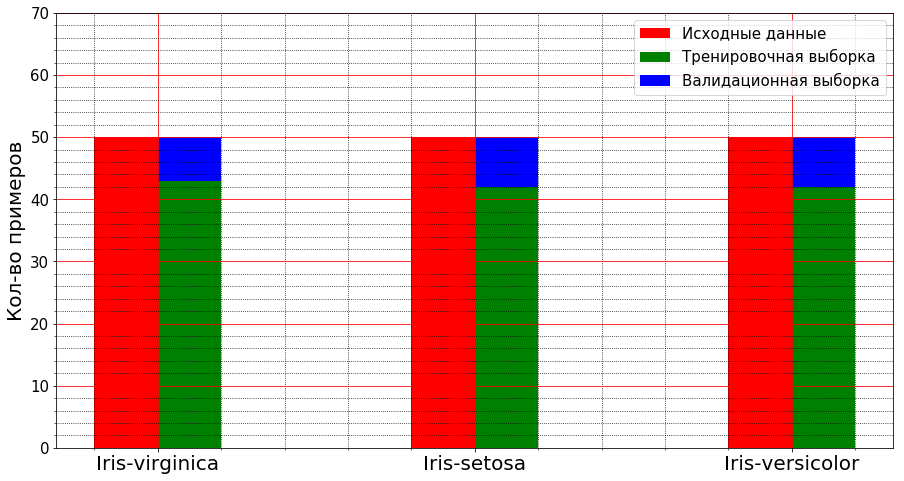

In [9]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

В класс мы передали количество разбиений, размер выборки и вызвали метод split() для более равномерного распределения. В результате разбиение получилось практически одинаковым.

Как разбить выборку на три части? Определить размер выборок и поделить дважды: сначала на тренировочную и остальное, затем остальное на валидационную и тестовую:

In [10]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

Второй тип разбиения — k-fold, перекрёстная валидация. Сделаем k-fold разбиение данных, используя класс KFold:

In [11]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

Ещё один способ разбиения — leave-one-out, отложенный пример. Сделаем leave-one-out разбиение пяти примерах из исходных данных с помощью класса LeaveOneOut:

In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


# Метрики качества регрессии

In [13]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
rmse

5.746042116100439

# Задача

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
data.dropna(inplace=True)
data.reset_index(inplace=True)
X = data.drop(columns=['balance_due'])
Y = data['balance_due']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

C:\Users\leone\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = sqrt(mean_squared_error(y_pred, y_test))

In [39]:
from sklearn.metrics import accuracy_score
import numpy as np

In [42]:
y_test = np.ones(100)

In [45]:
y_pred = np.ones(100)

In [47]:
y_pred[0] = 0

In [49]:
accuracy_score(y_test, y_pred)

0.99

In [50]:
from sklearn.metrics import f1_score

In [53]:
precision = 0.75
recall = 0.6
f1_scoree = (2 * precision * recall) / (precision + recall)
f1_scoree

0.6666666666666665

In [54]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
f1_score = f1_score(y_true, y_pred)
f1_score

0.6666666666666665

In [55]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score

y_true = [0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]
precision = precision_score(y_true, y_pred)
precision

0.4

In [56]:
recall = recall_score(y_true, y_pred)
recall

1.0

# Практика для метрик классификации

In [2]:
voice_data = pd.read_csv('voiceDataSet.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


- meanfreq: средняя частота голоса (в кГц)
- sd: стандартное отклонение частоты голоса
- median: медианная частота (в кГц)
- Q25: значение в первом квартиле (в кГц)
- Q75: значение в третьем квартиле (в кГц)
- IQR: интерквартильный размах (в кГц)
- skew: ассиметрия
- kurt: эксцесс
- sp.ent: спектральная энтропия
- sfm: энтропия Винера
- mode: мода частоты
- centroid: частотный центроид
- meanfun: средняя основная частота, измеренная по акустическому сигналу
- minfun:  минимальная основная частота, измеренная по акустическому сигналу
- maxfun: максимальная основная частота, измеренная в акустическом сигнале
- meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу
- mindom: минимум доминирующей частоты, измеренной в акустическом сигнале
- maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале
- dfrange: диапазон доминантных частот, измеренное на звуковой сигнал
- modindx: индекс модуляции голоса

In [3]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

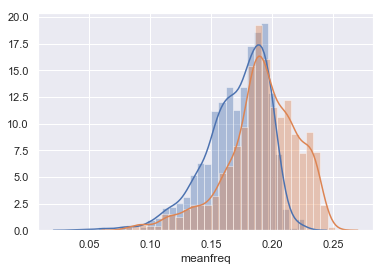

In [9]:
sns.distplot(voice_data[voice_data.label == 'male']['meanfreq'])
sns.distplot(voice_data[voice_data.label == 'female']['meanfreq'])

### Задание
Попробуйте построить модель, предсказывающую пол обладателя записи голоса.

Для этого:

Разделите выборку на обучающую и тренировочную с параметрами test_size=0.3, random_state=42

Нормализуйте признаки с помощью функции StandardScaler(). Для обучающей и тестовой выборки по отдельности!

Обучите модель логистической регрессии на подготовленных данных.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
voice_data['binary_label'] = voice_data.apply(lambda x: 0 if x['label'] == 'male' else 1, axis=1)

In [14]:
X = voice_data.drop(columns=['label', 'binary_label'])
y = voice_data['binary_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

C:\Users\leone\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [20]:
acc

0.9726603575184016

Теперь познакомимся с новым алгоритмом классификации, а также снова потренируемся делить выборку и осуществлять кросс-валидацию. Кроме того, посмотрим, как можно оценить качество классификации для случая, когда наша классификация не бинарная, т.е. у нас несколько классов.

In [84]:
glass_data = pd.read_csv('glass.csv')

In [85]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Наша классификация мультиклассовая, поэтому мы должны посмотреть, сколько у нас классов. Если вы вообще ничего не знаете о задаче в плане количества классов, обязательно начинайте с этого, поскольку это повлияет на ход решения. Особенно важно понять, бинарная классификация или нет.

In [86]:
glass_data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Итак, мы выяснили, сколько у нас классов и узнали, что в этот раз у нас будет не бинарная классификация. А значит, мы не сможем использовать некоторые метрики качества (например, precision и recall).

Приступим непосредственно к построению модели. На примере этой задачи мы узнаем новый алгоритм kNN (метод ближайших соседей). Это один из простейших методов классификации. 

Его называют ленивым классификатором, потому что во время обучения модели он ничего не делает, просто считывает и сохраняет тренировочные данные. Сама классификация для него начинается тогда, когда ему дают тестовые данные. Тогда kNN проходит два базовых шага:

Сначала он ищет k ближайших размеченных точек данных – эти точки и называют k ближайшими соседями.
Затем, используя классы соседей, kNN решает, как лучше классифицировать новые данные. 

Пример
Предположим, что алгоритм хочет классифицировать вас по профессии. Он видит, что люди, рядом с которыми вы находитесь (родители, друзья), — врачи. Тогда он решает, что вы — тоже скорее всего врач. Грубо говоря, он основывается на принципе, что подобное находится рядом с подобным.

А что делать, если ближайшие соседи не принадлежат одному классу? Можно решать по принципу большинства или дать каждому соседу вес (в зависимости от удаленности), с которым он будет вносить вклад в решение.

Например, попробуем классифицировать зеленый кружочек. На этом примере мы видим, что выбор числа соседей (это настраиваемый параметр) очень важен.

Если мы будем рассматривать трех соседей, то кружочек будет причислен к классу треугольников. А если пять соседей — к классу квадратов.

Важно! Количество соседей должно быть нечетное во избежание спорной ситуации.

Итак, мы разобрались с новым алгоритмом. Теперь воспользуемся k-fold валидацией на пяти разбиениях и обучим модель:

In [87]:
X = glass_data.drop(columns=['Type'])
y = glass_data['Type']

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
from sklearn.metrics import roc_auc_score
import numpy as np
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)
np.mean(cross_val_score(model, X, y, cv=kf, scoring="accuracy"))

0.5257575757575758

В следующей задаче мы будем диагностировать болезни сердца по различным медицинским параметрам пациентов.

In [109]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import roc_auc_score

In [126]:
data = pd.read_csv('heart_fin.csv', sep=';', encoding='cp1251')

def del_outliers(df, col_name):
    if df[col_name].dtype != 'object':
        col = df[col_name]
        quant_list = [col.quantile(0.25), col.quantile(0.75)]
        iqr = quant_list[1] - quant_list[0]
        diap_list = [quant_list[0] - 1.5 * iqr, quant_list[1] + 1.5 * iqr]
        diap_0, diap_1 = diap_list[0], diap_list[1]
        return df.query(f"{diap_0} < {col_name} < {diap_1}")
    else:
        return df
    
for col in data.columns:
    data = del_outliers(data, col)

In [127]:
len(data)

284

In [128]:
data.drop(columns=['oldpeak'], inplace=True)

X, y = data.drop(columns=['target']).values, data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)


In [129]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
rec_pred = roc_auc_score(y_test, y_pred)
rec_pred_proba = roc_auc_score(y_test, y_pred_proba)
print(rec_pred)
print(rec_pred_proba)

0.696969696969697
0.841991341991342


C:\Users\leone\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
model = KNeighborsClassifier(n_neighbors=3)
sh_split = ShuffleSplit(n_splits=1, random_state=5, test_size=0.15)
res = cross_val_score(model, X, y, cv=sh_split, scoring="roc_auc")
display(res)

array([0.72727273])

Важной характеристикой алгоритма МО является обобщающая способность — способность использовать знания, полученные при обучении, на новых данных. Обобщающая способность часто страдает из-за недообучения и переобучения, чтобы исправить это, нужно решать дилемму Bias-variance tradeoff.

Когда мы говорим про переобучение, мы сталкиваемся с высокой вариативностью данных. При недообучении мы наблюдаем высокое смещение: алгоритм недостаточно изучил данные и пропустил зависимости. В теоретическом уроке мы уже говорили, как избавиться от переобучения и неодообучения.

Рассмотрим пример обучения дерева решений с датасетом Титаника.

В качестве алгоритма возьмем один из методов классификации, который будет рассмотрен далее — решающее дерево. По сути, дерево решений — это метод представления решающих правил в иерархической структуре. 

C:\Users\leone\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  


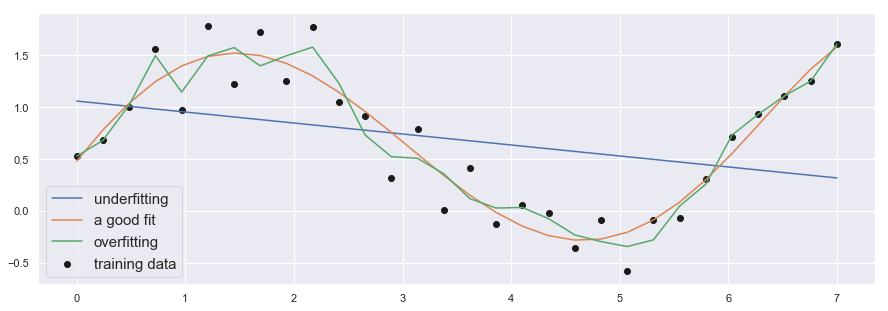

In [131]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

n_points = 30
x = np.linspace(0., 7., n_points)
y = np.sin(x) + np.random.rand(n_points)

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='k', label='training data')

for degree, label in zip([1, 5, 30], ['underfitting', 'a good fit', 'overfitting']):
    polynomial_coef = np.polyfit(x, y, deg=degree)
    inter_poly = np.polynomial.Polynomial(polynomial_coef[::-1])
    plt.plot(x, inter_poly(x), label=label)
plt.legend(fontsize=15)

Пример

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']].dropna()
X = data.drop(columns=['compliance'])
y = data['compliance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)
f1_train = f1_score(y_train, clf.predict(X_train))
f1_test = f1_score(y_test, clf.predict(X_test))
result = f1_train - f1_test
print(f1_train, f1_test, result)

0.6607803184665308 0.580226904376013 0.08055341409051786


Несбалансированная выборка (imbalanced dataset) — выборка, в которой примеров каких-то классов намного больше, чем других. В случае регрессии дисбалансом выборки будет ситуация, при которой распределение целевых значений будет сильно отличаться от равномерного.

Что происходит при дисбалансе классов:

У алгоритма появляется склонность к более популярным классам/значениям.
Нельзя использовать метрики, не учитывающие веса классов, пример — accuracy.
Что делать:
    - Изменить целевую метрику — в задачах классификации precision, recall, F1-score будут корректнее описывать алгоритм, чем accuracy.
    - Изменить выборку данных:
    - oversampling — увеличение количества объектов классов-меньшинств.
    - undersampling — сокращение количества объектов превалирующих классов.
    - Добавить штраф в оптимизационный функционал, прямо пропорциональный количеству объектов каждого класса (веса классов).
    - Возможно, есть смысл перейти к задачам Anomaly detection (поиск выбросов, шума и исключений)

Пример 

Обучим модель на несбалансированных данных. Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.

Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики \(F1\) на тренировочной выборке и на тестовой выборке.

Затем сделайте эту же выборку сбалансированной с помощью undersampling.

Для этого посчитайте количество примеров (n) класса-меньшинства, затем из класса-большинства возьмите n первых примеров.

То есть, в терминологии Python, возьмите срез (slice) от начала и до n, где n — количество примеров класса, которого в выборке представлено меньше.

Соедините две части выборки (с уменьшенным классом-большинством и с изначальным классом-меньшинством), сделайте точно такое же разбиение, как в задаче выше, и обучите такую же модель.

Посчитайте значение метрики \(F1\) на новой тестовой выборке с помощью новой модели. Вычтите из значения метрики на тестовой части сбалансированной выборки значение метрики на тестовой части несбалансированной выборки и запишите результат в переменную result.

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score

vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже

In [178]:
data = vis_data[['fine_amount', 'state_fee', 'late_fee', 
                 'discount_amount', 'balance_due', 'compliance']].dropna()
X = data.drop(columns=['compliance'])
y = data['compliance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)
f1_imbalanced = f1_score(y_test, clf.predict(X_test))
zeros = y[y == 0]
ones = y[y == 1]
y_down = zeros[:len(ones)].append(ones)
X_down = X.loc[y_down.index]
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.3, shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)
f1_balanced = f1_score(y_test, clf.predict(X_test))
result = f1_balanced - f1_imbalanced 
result

0.18272749967696011

In [142]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

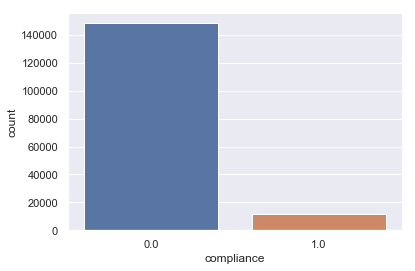

In [143]:
sns.countplot(x='compliance', data=data)